# BCDATA Data Science Workshop

### Introduction to the SciPy stack: NumPy, matplotlib, SciPy and pandas

1. [Overview of the SciPy stack](#overview)
2. [NumPy](#numpy)
  * [Numerical constants](#numerical-constants)
  * [Creating NumPy arrays](#creating-numpy-arrays)
  * [Stacking arrays](#stacking-arrays)
  * [Array shape and resize](#array-shape-resize)
  * [Array indexing and slicing](#indexing-slicing)
  * [Array functions (ufuncs)](#ufuncs)
  * [Arithmetic array operations](#arithmetic-array-operations)
3. [matpotlib](#matplotlib)
  * [pyplot commands](#pyplot-commands)
  * [Parametric plots](#parametric-plots)
  * [Subplots](#subplots)
  * [Other kinds of plots](#other-plots)
4. [SciPy](#scipy)
  * [Numerical integration](#numerical-integration)
  * [Differential equations](#differential-equations)
  * [Euler's 3-body problem](#euler-three-body-problem)
  * [Linear algebra](#linear-algebra)
5. [pandas](#pandas)

---

Patrick Walls

pwalls@math.ubc.ca

---

<a id='overview'></a>
## Overview of the SciPy stack

The [SciPy](https://scipy.org/) stack is a collection of Python packages for scientific computing:

* [NumPy](http://www.numpy.org/) provides multidimensional array structures and fast array computations
* [matplotlib](http://matplotlib.org/) is a 2D plotting library built on NumPy
* [SciPy](https://scipy.org/scipylib/index.html) is a library of scientific computing algorithms built on NumPy
* [pandas](http://pandas.pydata.org/) provides data structures and tools for data analysis 
* [SymPy](http://www.sympy.org/en/index.html) is a symbolic computing package
* [IPython](http://ipython.org/) provides interactive computing (such as the Python kernel for Jupyter notebooks)

We will look at the first four packages for scientific computing. Let's begin by importing them:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
%matplotlib inline

The last line above is a [Jupyter magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html) and is required to display matplotlib figures in the notebook.

<a id='numpy'></a>
## NumPy

We present some of the basic features of the NumPy package. See the [NumPy documentation](https://docs.scipy.org/doc/numpy-dev/user/index.html) for more information.

The essential datatype for scientific computing in Python is the [NumPy array](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#the-basics). NumPy arrays are multidimensional, homogeneous data structures built for fast numerical computation.

<a id='numerical-constants'></a>
### Numerical constants

Constants $\pi$ and $e$:

In [2]:
np.pi

3.141592653589793

In [3]:
np.e

2.718281828459045

<a id='creating-numpy-arrays'></a>
### Creating NumPy arrays

The most common methods for creating NumPy arrays are:

| Function | Description |
| :--- | :--- |
| `numpy.array(a)` | create NumPy array from sequence `a` |
| `numpy.linspace(a,b,N)` | create NumPy array with `N` equally spaced from `a` to `b` (inclusively)|
| `numpy.arange(a,b,step)` | create NumPy array with values from `a` to `b` (exclusively) incremented by `step`|
| `numpy.eye(N)` | creat $N$ by $N$ identity matrix |
| `numpy.ones((d1,...,dn))` | create NumPy array (with shape `(d1,...,dn)`) with entries all equal to 1 |
| `numpy.zeros((d1,...,dn))` | create NumPy array (with shape `(d1,...,dn)`) with entries all equal to 0 |
| `numpy.random.rand(d1,...,dn)` | create NumPy array (with shape `(d1,...,dn)`) with entries sampled uniformly from `[0,1)` |
| `numpy.random.randn(d1,...,dn)` | create NumPy array (with shape `(d1,...,dn)`) with entries sampled from the standard normal distribution |
| `numpy.random.randint(a,b,size))` | create NumPy array (with shape `size`) with integer entries from `low` (inclusive) to `high` (exclusive) |

In [4]:
np.array([[2,1],[-3,4]])

array([[ 2,  1],
       [-3,  4]])

In [5]:
np.linspace(0,1,6)

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [6]:
np.arange(0,1,0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [7]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [8]:
np.ones((3,2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [9]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [10]:
np.random.randint(0,10,(2,5))

array([[7, 6, 3, 5, 0],
       [0, 8, 7, 9, 3]])

<a id='stacking-arrays'></a>
### Stacking arrays

Create new arrays by combining lists of arrays:

| Function | Description |
| :--- | :--- |
| `numpy.vstack([A,B,...])` | stack list of arrays along first axis (vertically) |
| `numpy.hstack([A,B,...])` | stack list of arrays along second axis (horizontally) |

In [11]:
I = np.eye(3)
A = I
B = 2*I
C = 3*I
D = 4*I
block_matrix = np.vstack([ np.hstack([A,B]) , np.hstack([C,D]) ])

In [12]:
print(block_matrix)

[[ 1.  0.  0.  2.  0.  0.]
 [ 0.  1.  0.  0.  2.  0.]
 [ 0.  0.  1.  0.  0.  2.]
 [ 3.  0.  0.  4.  0.  0.]
 [ 0.  3.  0.  0.  4.  0.]
 [ 0.  0.  3.  0.  0.  4.]]


<a id='array-shape-resize'></a>
### Array shape and resize

We can access the shape of an array by the [`shape` attribute](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#shape-manipulation).

In [13]:
arr = np.random.randint(0,10,(4,6))
print(arr)

[[9 2 4 6 1 2]
 [5 4 9 4 5 0]
 [8 2 8 3 6 3]
 [3 2 9 2 5 6]]


In [14]:
arr.shape

(4, 6)

And we can change an array's shape using the [`resize` method](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.resize.html#numpy.ndarray.resize):

In [15]:
arr = np.arange(1,10)
print(arr)

[1 2 3 4 5 6 7 8 9]


In [16]:
arr.shape

(9,)

In [17]:
arr.resize(3,3)
print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


<a id='indexing-slicing'></a>
### Array indexing and slicing

Access [array entries and sub-arrays](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#indexing-slicing-and-iterating) using bracket notation (and notice that arrays begin with index 0):

In [18]:
arr = np.random.randint(0,10,(5,8))
print(arr)

[[6 8 7 3 6 9 7 0]
 [4 5 2 2 6 6 2 8]
 [4 9 8 5 5 8 9 9]
 [2 5 9 8 4 7 9 6]
 [7 2 3 2 2 2 0 5]]


Select the entry at index (2,7) (the 3rd row and 8th column):

In [19]:
arr[2,7]

9

Select the first column (at index 0) and notice that a column is a 1-dimensional array: 

In [20]:
arr[:,0]

array([6, 4, 4, 2, 7])

Select the fifth row (at index 4):

In [21]:
arr[4,:]

array([7, 2, 3, 2, 2, 2, 0, 5])

Use negative integers to select the entries at indices counted from the last index. For example, select the second last column:

In [22]:
arr[:,-2]

array([7, 2, 9, 9, 0])

Select the subarray of rows at index 1 and 2, and columns at index 0 and 1:

In [23]:
arr[1:3,0:2]

array([[4, 5],
       [4, 9]])

**WARNING!** Taking a slice of an array does not create a new array. A slice is a view of the original array and changes to the original array will change the view.

In [24]:
M = np.array([[4,5],[-1,2]])
print(M)

[[ 4  5]
 [-1  2]]


In [25]:
N = M[1,:]
print(N)

[-1  2]


In [26]:
M[1,1] = 100
print(M)

[[  4   5]
 [ -1 100]]


In [27]:
print(N)

[ -1 100]


<a id='ufuncs'></a>
### Array functions (ufuncs)

NumPy array functions (see [universal functions](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#universal-functions)) are mathematical functions which operate elementwise on arrays and produce arrays as output. Common mathematical functions available in NumPy:

| NumPy function | Description |
| :---: | :---: |
| `numpy.sin(x)` | $\sin(x)$ |
| `numpy.cos(x)` | $\cos(x)$ |
| `numpy.tan(x)` | $\tan(x)$ |
| `numpy.exp(x)` | $e^x$ |
| `numpy.log(x)` | $\ln(x)$ |
| `numpy.sqrt(x)` | $\sqrt{x}$ |

In [28]:
x = np.arange(0,2,0.5)
print(x)

[ 0.   0.5  1.   1.5]


In [29]:
np.sin(2*np.pi*x)

array([  0.00000000e+00,   1.22464680e-16,  -2.44929360e-16,
         3.67394040e-16])

In [30]:
arr = np.arange(0,5)
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ])

<a id='arithmetic-array-operations'></a>
### Arithmetic array operations

[Arithmetic array operations](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#basic-operations) such as addition and multiplication are performed elementwise:

In [31]:
a = np.array([3,-2,0,1])
b = np.array([2,4,6,-4])

In [32]:
a + b

array([ 5,  2,  6, -3])

In [33]:
a * b

array([ 6, -8,  0, -4])

In [34]:
a / b

array([ 1.5 , -0.5 ,  0.  , -0.25])

Array exponentiation uses the `**` symbol and is computed elementwise:

In [35]:
x = np.array([1,2,3,4])
x**2

array([ 1,  4,  9, 16])

Again, unlike other matrix programming languages like MATLAB and Octave, **array multiplication is performed elementwise**:

In [36]:
A = np.random.randint(0,10,(3,4))
print(A)

[[0 5 9 3]
 [3 8 0 8]
 [1 0 3 8]]


In [37]:
A*A

array([[ 0, 25, 81,  9],
       [ 9, 64,  0, 64],
       [ 1,  0,  9, 64]])

[New in Python 3](https://wiki.python.org/moin/Python2orPython3), the symbol `@` computes matrix multiplication for NumPy arrays:

In [38]:
A = np.array([[1,1],[2,3]])
print(A)

[[1 1]
 [2 3]]


In [39]:
A @ A

array([[ 3,  4],
       [ 8, 11]])

<a id='matplotlib'></a>
## matplotlib

[Matplotlib](http://matplotlib.org/) is a 2D plotting library built on NumPy.

<a id='pyplot-commands'></a>
### pyplot commands

The most common plotting commands are called using the subpackage [`matplotlib.pyplot`](http://matplotlib.org/api/pyplot_summary.html) (usually imported under the alias `plt`). Commands are modelled after common MATLAB plotting commands.

| Command | Description |
| :--- | :--- |
| `pyplot.plot(x,y)` | create 2D plot connecting points with coordinates specified by arrays `x` and `y` |
| `pyplot.title("Figure Title")` | display the figure with a title |
| `pyplot.xlim([a,b])` | restrict the $x$-axis to the interval `[a,b]` |
| `pyplot.ylim([a,b])` | restrict the $y$-axis to the interval `[a,b]` |
| `pyplot.xlabel("x label")` | add a text label to $x$-axis |
| `pyplot.ylabel("y label")` | add a text label to $y$-axis |
| `pyplot.show()` | render the current plot |
| `pyplot.axis(...)` | set axis to "equal", "off", etc. |

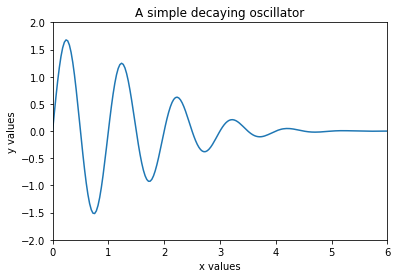

In [40]:
x = np.linspace(0,6,200)
y = 1.7 * np.exp(-0.2 * x**2) * np.sin(2 * np.pi * x)
plt.plot(x,y)
plt.xlim([0,6])
plt.ylim([-2,2])
plt.title('A simple decaying oscillator')
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

<a id='parametric-plots'></a>
### Parametric plots

Write a function called `parametric_plots` which takes input parameters `a` and `k` and plots the parametric equation

\begin{align*}
x(t) &= 2 k \cos(t) - a \cos(k t) \\
y(t) &= 2 k \sin(t) - a \sin(k t)
\end{align*}

for $t \in [0,2\pi]$. Include a title for each subplot to display the values for $a$ and $k$, and use `plt.axis('equal')` to display the figure with equal units in both the $x$ and $y$ axes. 

In [41]:
def parametric_plot(a,k):
    t = np.linspace(0,2*np.pi,1000)
    x = 2*k*np.cos(t) - a*np.cos(k*t)
    y = 2*k*np.sin(t) - a*np.sin(k*t)
    plt.plot(x,y)
    plt.axis('equal')
    plt.axis('off')
    plt.show()

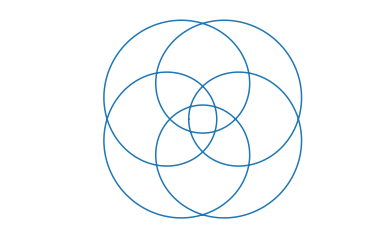

In [42]:
parametric_plot(13,5)

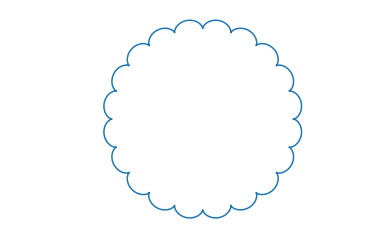

In [43]:
parametric_plot(2,21)

<a id='subplots'></a>
### Subplots

Create a $n$ by $m$ grid of subplots using the `pyplot.subplot(n,m,i)` function. The third argument $i$ specifies which subplot is the current axis object to which pyplot commands are assigned.

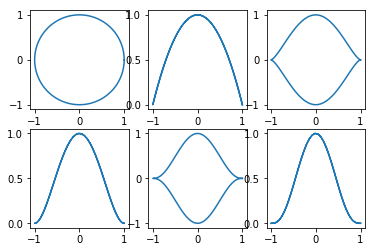

In [44]:
plt.subplot(2,3,1)
t = np.linspace(0,2*np.pi,100)
for i in range(1,7):
    x = np.cos(t)
    y = np.sin(t)**i
    plt.subplot(2,3,i)
    plt.plot(x,y)
plt.show()

<a id='other-plots'></a>
### Other kinds of plots

The [pyplot](http://matplotlib.org/api/pyplot_summary.html) library can create many kinds of plots such as scatter plots, bar plots and histograms.

Create a random scatter plot:

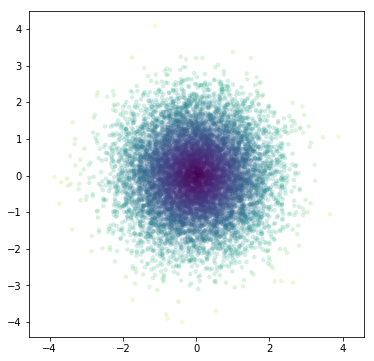

In [45]:
N = 10000
x = np.random.randn(N)
y = np.random.randn(N)
color = np.sqrt(x**2 + y**2)
plt.figure(figsize=(6,6))
plt.scatter(x,y,c=color,s=20,alpha=0.2,lw=0)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.axis('equal')
plt.show()

Create a random histogram:

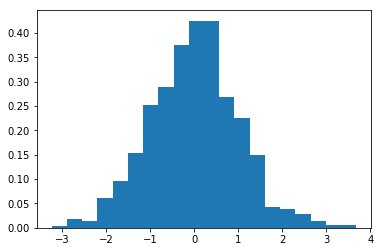

In [46]:
N = 1000
x = np.random.randn(N)
plt.hist(x,bins=20,normed=True)
plt.show()

<a id='scipy'></a>
## SciPy

[SciPy](https://scipy.org) is a library containing packages for numerical integration, linear algebra, signal processing, and more. Check out the [SciPy tutorial](https://docs.scipy.org/doc/scipy/reference/#tutorial).

<a id='numerical-integration'></a>
### Numerical integration

The `scipy.integrate` subpackage has several methods for numerically computing integrals such as the trapezoid rule and Simpson's rule. Let's look at the `quad` function in the [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html) module which is based on the [QUADPACK](https://en.wikipedia.org/wiki/QUADPACK) Fortran algorithm:

In [47]:
from scipy.integrate import quad

Let's plot the Gaussian $e^{-x^2}$ and verify the formula

$$
\int_{-\infty}^{\infty} e^{-x^2} = \sqrt{\pi}
$$

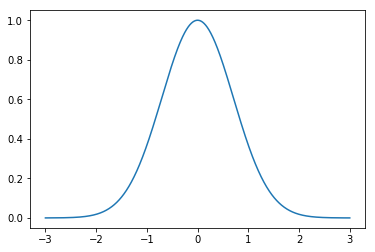

In [48]:
x = np.linspace(-3,3,1000)
y = np.exp(-x**2)
plt.plot(x,y)

In [49]:
I, err = quad(lambda x: np.exp(-x**2),-np.inf,np.inf)
print(I)

1.7724538509055159


In [50]:
np.pi**0.5

1.7724538509055159

<a id='differential-equations'></a>
### Differential equations

The [`odeint`](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#ordinary-differential-equations-odeint) function the scipy.integrate subpackage is an ODE solver which uses the lsoda Fortran library.

Let's plot numerical solutions of the logistic equation $y' = y(1-y)$ for different initial conditions $y(0)$.

In [51]:
from scipy.integrate import odeint

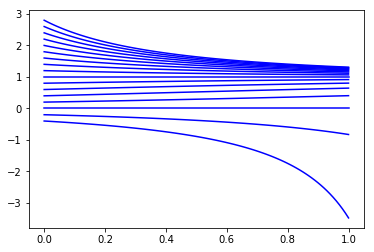

In [52]:
def odefun(y,t):
    return y*(1-y)

t = np.linspace(0,1,100)

for y0 in np.arange(-0.4,3,0.2):
    y = odeint(odefun,y0,t)
    plt.plot(t,y,'b')

<a id='euler-three-body-problem'></a>
### Euler's 3-body problem

[Euler's three-body problem](https://en.wikipedia.org/wiki/Euler%27s_three-body_problem) is a simplified (and admittedly physically impossible) version of the three-body problem. Euler's problem considers two stars fixed in space and a planet orbiting the stars in 2 dimensions. We will derive the equations of motion of the planet and then plot trajectories using SciPy's ODE solver `odeint`.

Use the following units: astronomical units (AU), years and solar mass (multiples of the mass of the Earth's Sun). With these units, the gravitational constant is $G = 4 \pi^2$. Introduce variables for the planet and the stars:

| Variable | Description |
| :---: | :---: |
| $m_{S_1}$ | mass of star 1 |
| $m_{S_2}$ | mass of star 2 |
| $m_P$ | mass of the planet |
| $x_{S_1}$ | (fixed) $x$-position of star 1 |
| $y_{S_1}$ | (fixed) $y$-position of star 1 |
| $x_{S_2}$ | (fixed) $x$-position of star 2 |
| $y_{S_2}$ | (fixed) $x$-position of star 2 |
| $x_P$ | $x$-position of the planet |
| $y_P$ | $y$-position of the planet |
| $\mathbf{x}$ | position vector of the planet |

Let $\mathbf{F}_1$ be the force of gravity of star 1 acting on the planet, and let $\mathbf{F}_2$ be the force of gravity of star 2 acting on the planet. [Newton's Law of Gravity](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) states:

\begin{align}
\mathbf{F}_1 &= - \frac{ G m_P m_{S_1} }{ || \mathbf{d}_1 ||^2} \frac{ \mathbf{d}_1 }{ || \mathbf{d}_1 || } \\
\mathbf{F}_2 &= - \frac{ G m_P m_{S_2} }{ || \mathbf{d}_2 ||^2} \frac{ \mathbf{d}_2 }{ || \mathbf{d}_2 || }
\end{align}

where $\mathbf{d}_1 = (x_P-x_{S_1},y_P-y_{S_1})$ is the vector from star 1 to the planet, and $\mathbf{d}_2 = (x_P-x_{S_2},y_P-y_{S_2})$ is the vector from star 2 to the planet.

[Newton's Second Law of Motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion) states:

$$
m_P \frac{ d^2 \mathbf{x} }{ dt^2 } = \mathbf{F}_1 + \mathbf{F}_2
$$

and this leads us to the system of second order ODEs which govern the motion of the planet:

\begin{align}
\frac{d^2x_P}{dt^2} &= - \frac{ G m_{S_1} (x_P - x_{S_1}) }{ || \mathbf{d}_1 ||^3} - \frac{ G m_{S_2} (x_P - x_{S_2}) }{ || \mathbf{d}_2 ||^3} \\
\frac{d^2y_P}{dt^2} &= - \frac{ G m_{S_1} (y_P - y_{S_1}) }{ || \mathbf{d}_1 ||^3} - \frac{ G m_{S_2} (y_P - y_{S_2}) }{ || \mathbf{d}_2 ||^3}
\end{align}

To plot trajectories of the planet using `odeint`, we first need to write the system as a first order system. Introduce new variables $u_1 = x_P$, $u_2 = x_P'$, $u_3 = y_P$ and $u_4 = y_P'$ and write

\begin{align}
u_1' &= u_2 \\
u_2' &= - \frac{ G m_{S_1} (u_1 - x_{S_1}) }{ || \mathbf{d}_1 ||^3} - \frac{ G m_{S_2} (u_1 - x_{S_2}) }{ || \mathbf{d}_2 ||^3} \\
u_3' &= u_4 \\
u_4' &= - \frac{ G m_{S_1} (u_3 - y_{S_1}) }{ || \mathbf{d}_1 ||^3} - \frac{ G m_{S_2} (u_3 - y_{S_2}) }{ || \mathbf{d}_2 ||^3}
\end{align}

where $\mathbf{d}_1 = (u_1-x_{S_1},u_3-y_{S_1})$ and $\mathbf{d}_2 = (u_1-x_{S_2},u_3-y_{S_2})$.

In [53]:
import scipy.linalg as la

In [54]:
def euler_three_body(S1,S2,M1,M2,u0,tf,numpoints=1000):
    '''
    Plot the trajectory of a planet in Euler's three-body problem.
    
    S1 - list of length 2, coordinates of Star 1
    S2 - list of length 2, coordinates of Star 2
    M1 - mass of Star 1 (in solar mass)
    M2 - mass of Star 2 (in solar mass)
    u0 - list of length 4, initial conditions of the planet: [xposition,xvelocity,yposition,yvelocity]
    tf - final time (in years), plot the trajectory for t in [0,tf]
    numpoints - the number of time values in the plot (default 1000)
    '''
    
    # Define the vector function on the right side of the system of the equations
    def f(u,t):
        G = 4*np.pi**2 # Gravitational constant
        d1 = la.norm([u[0]-S1[0],u[2]-S1[1]]) # Distance from star 1 to planet
        d2 = la.norm([u[0]-S2[0],u[2]-S2[1]]) # Distance from star 2 to planet
        dU1dt = u[1]
        dU2dt = -G*M1*(u[0]-S1[0])/d1**3 - G*M2*(u[0]-S2[0])/d2**3
        dU3dt = u[3]
        dU4dt = -G*M1*(u[2]-S1[1])/d1**3 - G*M2*(u[2]-S2[1])/d2**3
        return [ dU1dt , dU2dt , dU3dt , dU4dt ]

    t = np.linspace(0,tf,numpoints) # Array of time values (in years)
    u = odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

    plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
    plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
    plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
    plt.axis('equal')
    plt.show()

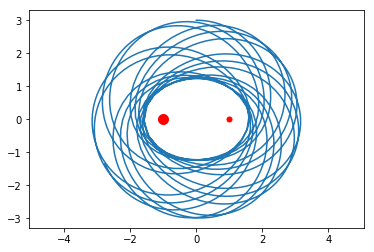

In [55]:
euler_three_body([-1,0],[1,0],2,1,[0,5,3,0],30)

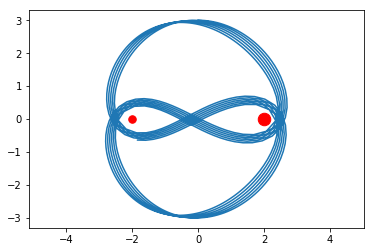

In [56]:
euler_three_body([-2,0],[2,0],1.5,2.5,[0,4.8,3,0],20)

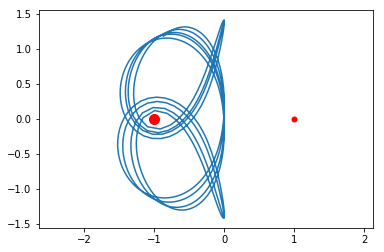

In [57]:
euler_three_body([-1,0],[1,0],2,1,[0,0,0,10],6)

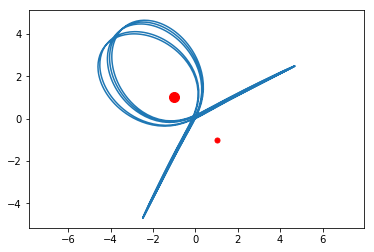

In [58]:
euler_three_body([-1,1],[1,-1],2,1,[0,10,0,5],30)

<a id='linear-algeba'></a>
### Linear algebra

Functions and algorithms for solving problems in linear algebra are contained in the [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html) subpackage. Here is a list of familiar functions:

| Function | Description |
| :--- | :--- |
| `numpy.linalg.matrix_power(A,n)` | compute $A^n$ |
| `scipy.linalg.inv(A)` | compute the inverse of `A` |
| `scipy.linalg.solve(A,b)` | solve the linear system `Ax = b` |
| `scipy.linalg.det(A)` | compute the determinant of `A` |
| `scipy.linalg.norm(v,ord)` | compute the (`ord`) norm of `v` (vector or matrix) |
| `scipy.linalg.eig(A)` | compute the eigenvalues and eigenvectors of `A` |
| `scipy.linalg.svd(A)` | compute the singular value decomposition of `A` |
| `scipy.linalg.lu(A)` | compute the LU decomposition of `A` |

In [59]:
import scipy.linalg as la
from numpy.linalg import matrix_power as mp

In [60]:
M = np.array([[0,1],[-1,0]])
print(M)

[[ 0  1]
 [-1  0]]


In [61]:
mp(M,2)

array([[-1,  0],
       [ 0, -1]])

Create a matrix $A$ with eigenvectors $v_1 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ and $v_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$, and corresponding eigenvectors $\lambda_1 = 3$ and $\lambda_2 = -2$:

In [62]:
lambda1 = 3
lambda2 = -2
D = np.diag([lambda1,lambda2])
print(D)

[[ 3  0]
 [ 0 -2]]


In [63]:
v1 = [1,2]
v2 = [1,-1]
P = np.column_stack([v1,v2])
print(P)

[[ 1  1]
 [ 2 -1]]


In [64]:
A = P @ D @ la.inv(P)
print(A)

[[-0.33333333  1.66666667]
 [ 3.33333333  1.33333333]]


In [65]:
evals, evecs = la.eig(A)
print(evecs)

[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


In [66]:
print(evals)

[-2.+0.j  3.+0.j]


### pandas

[pandas](http://pandas.pydata.org/) is the data analysis package in Python. It provides a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) object which acts like a spreadsheet. Let's import the package and some data:

In [67]:
import pandas as pd

The Vancouver Police Deparment publishes [crime data](http://data.vancouver.ca/datacatalogue/crime-data.htm) through City of Vancouver's [Open Data Catalogue](http://vancouver.ca/your-government/open-data-catalogue.aspx). Let's import the data (prepared and posted at [math.ubc.ca/~pwalls](www.math.ubc.ca/~pwalls)) using the [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function:

In [68]:
data = pd.read_csv('http://www.math.ubc.ca/~pwalls/data/van_crime.csv')

Use the DataFrame method `head` to display the first 5 rows of the data:

In [69]:
data.head()

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Mischief,2015,3,26XX E 49TH AVE,Victoria-Fraserview,496065.581256,5.452452e+06
1,Theft from Vehicle,2015,12,34XX WILLIAM ST,Hastings-Sunrise,497850.800800,5.457933e+06
2,Theft from Vehicle,2015,4,34XX WILLIAM ST,Hastings-Sunrise,497879.450446,5.457923e+06
3,Theft from Vehicle,2015,10,34XX WILLIAM ST,Hastings-Sunrise,497901.623450,5.457932e+06
4,Theft from Vehicle,2015,9,34XX WILLIAM ST,Hastings-Sunrise,497921.510576,5.457932e+06


We see that each row is a reported crime. Use the DataFrame method `info` to see the number of rows and the datatypes of the columns:

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45802 entries, 0 to 45801
Data columns (total 7 columns):
TYPE             45802 non-null object
YEAR             45802 non-null int64
MONTH            45802 non-null int64
HUNDRED_BLOCK    45802 non-null object
NEIGHBOURHOOD    41815 non-null object
X                45802 non-null float64
Y                45802 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.4+ MB


Use the DataFrame method `unique` to see the different types of crimes in the dataset:

In [71]:
data['TYPE'].unique()

array(['Mischief', 'Theft from Vehicle', 'Other Theft', 'Theft of Vehicle',
       'Break and Enter Residential/Other', 'Offence Against a Person',
       'Homicide', 'Break and Enter Commercial'], dtype=object)

Notice that we select columns using brackets and the column name. There are some crimes that do not include the longitude and latitude coordinates due to privacy. Let's do a query and select the rows where the `X` coordinate is 0:

In [72]:
data[data['X'] == 0].head(10)

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
168,Offence Against a Person,2015,12,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
223,Offence Against a Person,2015,9,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
225,Offence Against a Person,2015,2,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
244,Offence Against a Person,2015,4,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
407,Offence Against a Person,2015,9,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
677,Offence Against a Person,2015,10,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
756,Offence Against a Person,2015,1,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
1047,Offence Against a Person,2015,5,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
1316,Offence Against a Person,2015,9,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
1452,Offence Against a Person,2015,7,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0


We can visualize the entire dataset (excluding the rows without coordinates) by plotting the longitude and latitude of each row. We set the opacity `alpha=0.2` so that we see the density of points as well as the size `s=4` of the points and the size of the figure:

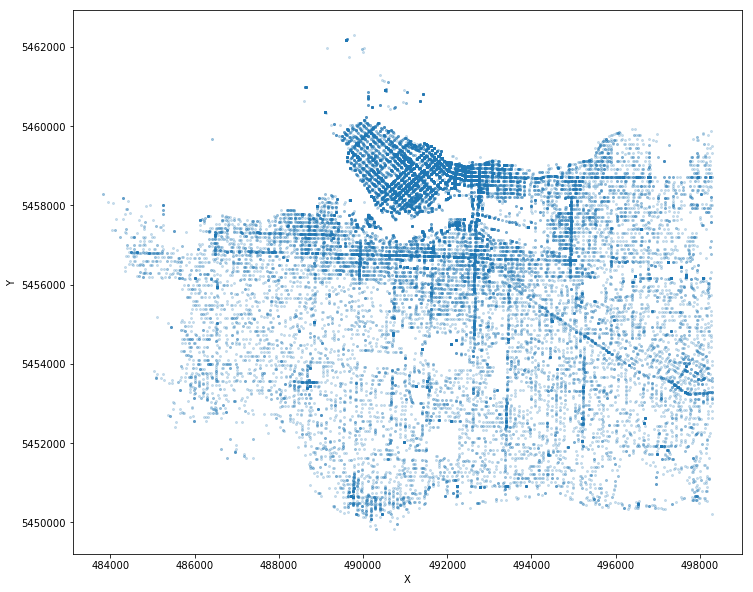

In [73]:
data[data['X'] > 0].plot(kind='scatter',x='X',y='Y',s=4,alpha=0.2,figsize=(12,10))